# Python Example: Computing the Confusion Matrix for Different Algorithms

We will cover Logistic Regression, k-Nearest Neighbors (k-NN), Decision Trees, Random Forest, and Support Vector Machines (SVM).

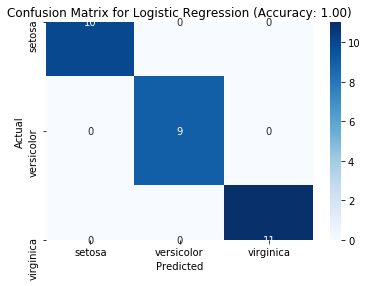

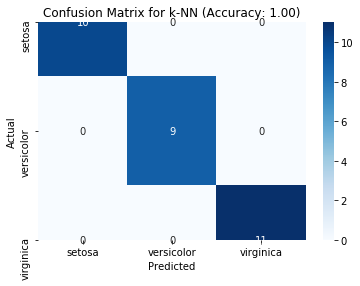

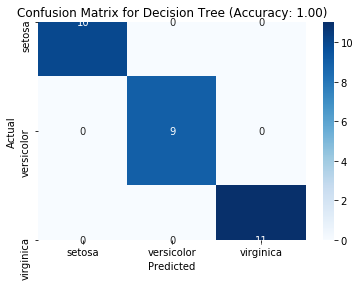

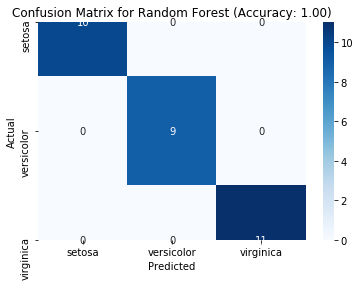

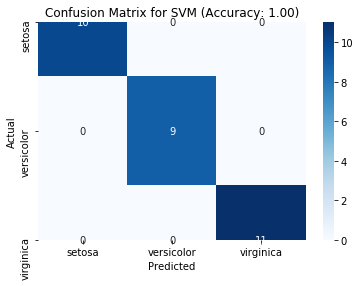

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (example: Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()

# Split dataset into features (X) and target (y)
X = data['data']
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to compute confusion matrix
def compute_confusion_matrix(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['target_names'], yticklabels=data['target_names'])
    plt.title(f'Confusion Matrix for {model_name} (Accuracy: {acc:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return cm, acc

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'k-NN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear')
}

# Iterate through models and compute confusion matrix for each
for model_name, model in models.items():
    cm, acc = compute_confusion_matrix(model, X_train, X_test, y_train, y_test, model_name)


# Explanation of the Code

### Dataset:
We're using the **Iris dataset** for this example. It’s a simple multi-class classification problem, where we predict the type of flower based on its features.

### Train-Test Split:
The dataset is split into training and testing sets using `train_test_split`. 20% of the data is used for testing.

### Model Training & Prediction:
For each model (Logistic Regression, k-NN, Decision Tree, Random Forest, and SVM), we:
- Fit the model using the training data.
- Make predictions on the test data.

### Confusion Matrix:
The **confusion matrix** is computed using `confusion_matrix`, and then displayed as a heatmap using **Seaborn** for visualization.

### Accuracy Score:
The accuracy of each model is computed using `accuracy_score`.

---

# Efficient Model Comparison

When performing **model comparison**, you should consider more than just accuracy. The following metrics can provide a comprehensive evaluation:

### Precision:
How many of the predicted positives were actual positives? This metric is important when false positives are costly.

\[
Precision = \frac{TP}{TP + FP}
\]

### Recall (Sensitivity):
How many of the actual positives were correctly predicted? This is important when missing true positives is costly.

\[
Recall = \frac{TP}{TP + FN}
\]

### F1-Score:
Harmonic mean of Precision and Recall. It balances both precision and recall.

\[
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
\]

### AUC-ROC (Area Under the Curve - Receiver Operating Characteristics):
Measures the model’s ability to distinguish between classes. A higher AUC value indicates a better model.

---

# Adding Model Comparison Code

You can extend the above example to compute **precision**, **recall**, and **F1-score** for each model using `classification_report` from **scikit-learn**:


In [3]:
from sklearn.metrics import classification_report

# Function to compute classification report
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print Classification Report (includes Precision, Recall, F1-Score)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=data['target_names']))
    print("-" * 60)
    
# Iterate through models and compute classification report for each
for model_name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test, model_name)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------
Classification Report for k-NN:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------------------------
Classification Report for Decision 

This will output **precision**, **recall**, **F1-score**, and **support** for each class in your model, providing deeper insight into performance beyond accuracy.

### Interpretation of Support in Model Evaluation

In the context of evaluating machine learning models, particularly classification models, **support** refers to the number of true instances for each class in the dataset. It indicates how many actual instances of a particular class were present in the test dataset. 

#### Interpretation of Support:
- **High Support**: A higher support value for a class indicates that there are more actual instances of that class in the dataset, making the performance metrics (such as precision, recall, F1-score) more reliable for that class.
- **Low Support**: A lower support value means fewer examples of that class. Metrics like precision and recall could be less stable or informative because they’re calculated based on fewer examples.

#### Example:
If you have a classification report that shows the support for different classes:

| Class   | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| Class A | 0.85      | 0.80   | 0.82     | 50      |
| Class B | 0.70      | 0.90   | 0.79     | 10      |

- **Class A** has support of 50, so the performance metrics are based on 50 instances of Class A.
- **Class B** has support of only 10, so the performance metrics for Class B are based on fewer examples, which might make them less reliable.

#### Why It Matters:
The **support** helps to contextualize the other performance metrics. For instance, if a model has high precision and recall for a class with very low support, it may not generalize well when applied to larger datasets with more examples from that class.
